In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_importance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn import preprocessing

import seaborn as sns


In [2]:
df= pd.read_csv("/content/final_balanced.csv", low_memory=False)

In [3]:
df.shape

(2549288, 73)

# **KNN (8/2) - Balanced Dataset**

In [4]:
for f in df.columns:
    if df[f].dtype == 'object':
        label = preprocessing.LabelEncoder()
        label.fit(list(df[f].values))
        df[f] = label.transform(list(df[f].values))

In [5]:
df = df.astype(float)
df.head(20)

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624.0,1353186.0,9371.0,4504.0,9823.0,80.0,6.0,24512.0,3974862.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,625.0,1353186.0,9371.0,4504.0,9823.0,80.0,6.0,24513.0,63.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,626.0,1353187.0,9371.0,4505.0,9823.0,80.0,6.0,24513.0,476078.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,627.0,1353187.0,9371.0,4505.0,9823.0,80.0,6.0,24514.0,151.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,628.0,1353188.0,9371.0,4506.0,9823.0,80.0,6.0,24514.0,472507.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,629.0,1353188.0,9371.0,4506.0,9823.0,80.0,6.0,24514.0,138.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,630.0,1353189.0,9371.0,4507.0,9823.0,80.0,6.0,24514.0,469596.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,631.0,1353189.0,9371.0,4507.0,9823.0,80.0,6.0,24514.0,1978.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,632.0,1353190.0,9371.0,4508.0,9823.0,80.0,6.0,24514.0,468629.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,633.0,1353190.0,9371.0,4508.0,9823.0,80.0,6.0,24515.0,102.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
df.isna().sum()

,0
Unnamed: 0,0
Flow ID,0
Src IP,0
Src Port,0
Dst IP,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
Flow ID,0
Src IP,0
Src Port,0
Dst IP,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [8]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549288 entries, 0 to 2549287
Data columns (total 72 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow ID            float64
 1   Src IP             float64
 2   Src Port           float64
 3   Dst IP             float64
 4   Dst Port           float64
 5   Protocol           float64
 6   Timestamp          float64
 7   Flow Duration      float64
 8   Tot Fwd Pkts       float64
 9   Tot Bwd Pkts       float64
 10  TotLen Fwd Pkts    float64
 11  TotLen Bwd Pkts    float64
 12  Fwd Pkt Len Max    float64
 13  Fwd Pkt Len Min    float64
 14  Fwd Pkt Len Mean   float64
 15  Fwd Pkt Len Std    float64
 16  Bwd Pkt Len Max    float64
 17  Bwd Pkt Len Min    float64
 18  Bwd Pkt Len Mean   float64
 19  Bwd Pkt Len Std    float64
 20  Flow Byts/s        float64
 21  Flow Pkts/s        float64
 22  Flow IAT Mean      float64
 23  Flow IAT Std       float64
 24  Flow IAT Max       float64
 25  Flow IAT Min      

In [10]:
y = df['Label']
X = df.drop(['Label'], axis=1, inplace=False)

print(X.shape)
print(y.shape)

(2549288, 71)
(2549288,)


In [11]:
RANDOM_STATE = 42
TEST_SIZE = 0.2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2039430, 71)
(2039430,)
(509858, 71)
(509858,)


In [13]:
%%time
model=KNeighborsClassifier(n_neighbors=6,algorithm='kd_tree',n_jobs=25,weights = 'uniform')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

CPU times: user 23min 24s, sys: 8.95 s, total: 23min 33s
Wall time: 17min 9s


In [14]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

In [15]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1score = f1_score(y_test, y_pred)
print("F1-score:", f1score)

pr = precision_score(y_test,y_pred)
print("Precision score:", pr)

rs = recall_score(y_test,y_pred)
print("Recall score:", rs)

# Evaluate the best model
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9991840865495883
F1-score: 0.9991830001178366
Precision score: 0.9991005887412563
Recall score: 0.9992654250910362
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    255289
         1.0       1.00      1.00      1.00    254569

    accuracy                           1.00    509858
   macro avg       1.00      1.00      1.00    509858
weighted avg       1.00      1.00      1.00    509858



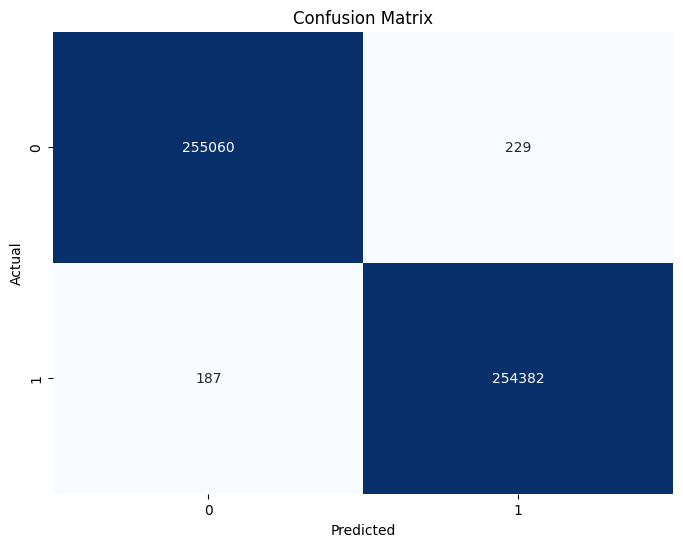

In [16]:
confusion = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

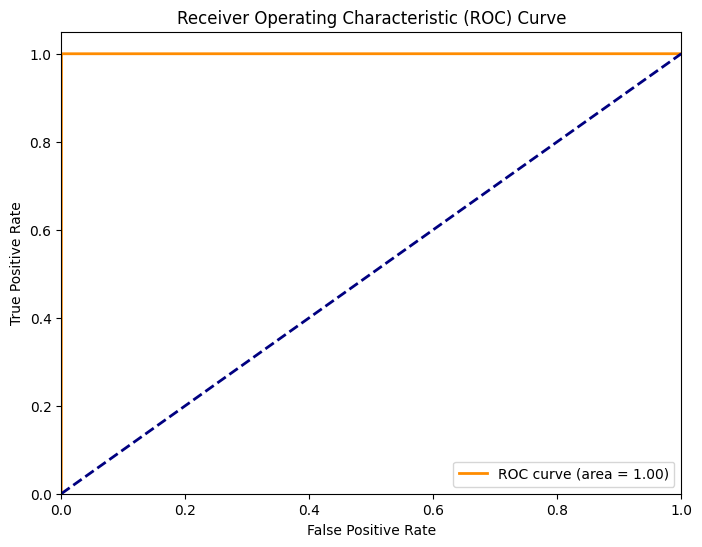

In [17]:
# prompt: Draw ROC for this KNN

from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred are already defined from your KNN model
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

using weight: distance

In [18]:
%%time
model_kd_distance=KNeighborsClassifier(n_neighbors=6,algorithm='kd_tree',n_jobs=25,weights = 'distance')
model_kd_distance.fit(X_train, y_train)
y_pred_kd_distance = model_kd_distance.predict(X_test)

CPU times: user 22min 49s, sys: 8.32 s, total: 22min 58s
Wall time: 16min 31s


In [19]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1score = f1_score(y_test, y_pred)
print("F1-score:", f1score)

pr = precision_score(y_test,y_pred)
print("Precision score:", pr)

rs = recall_score(y_test,y_pred)
print("Recall score:", rs)

# Evaluate the best model
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9991840865495883
F1-score: 0.9991830001178366
Precision score: 0.9991005887412563
Recall score: 0.9992654250910362
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    255289
         1.0       1.00      1.00      1.00    254569

    accuracy                           1.00    509858
   macro avg       1.00      1.00      1.00    509858
weighted avg       1.00      1.00      1.00    509858



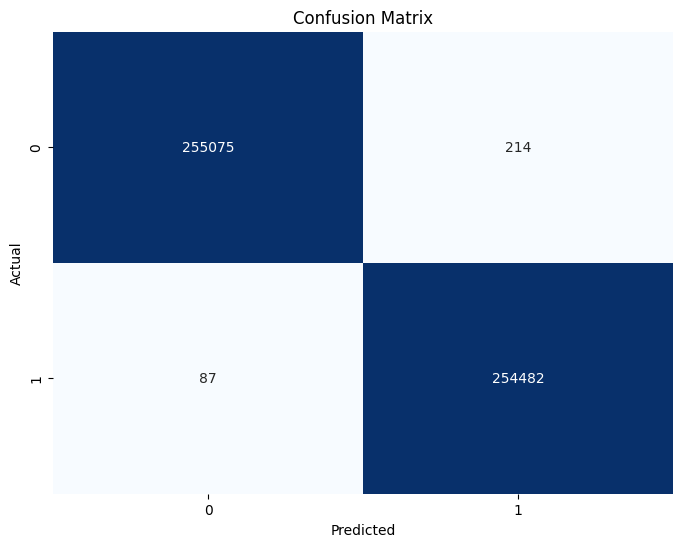

In [20]:
confusion = confusion_matrix(y_test, y_pred_kd_distance)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

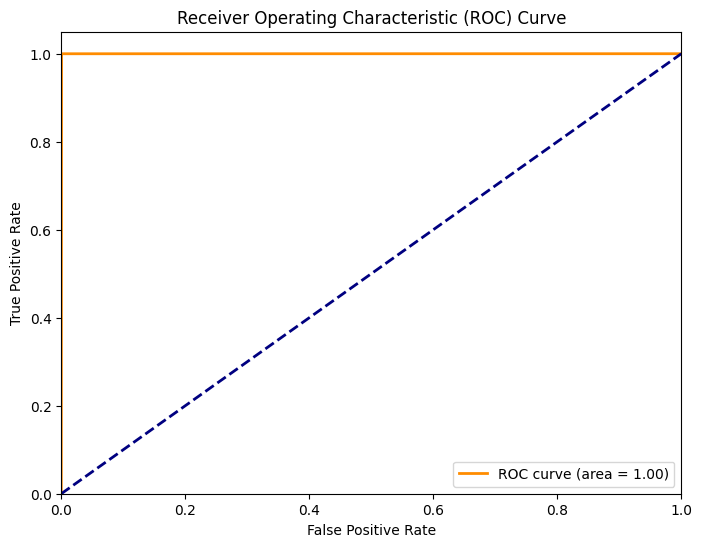

In [21]:
# prompt: Draw ROC for this KNN
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred are already defined from your KNN model
y_pred_proba = model_kd_distance.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()